In [ ]:
# !pip install -U pandas-profiling[notebook]
# !pip install --upgrade pandas-profiling
# !pip install --upgrade numpy
# !pip install --upgrade pandas
# !pip install --upgrade matplotlib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from pandas_profiling import ProfileReport
# importante biblioteca de analise

# Kaggle - Comunidade de dados, onde existem diversos datasets atualizados e publicos
# Possui muitos codigos para vizualizacao e aprendizado
# https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset
# https://colab.research.google.com/drive/1Cgs6SObf1x1O7Tg4-4xIjkjLL1ZYDcp5#scrollTo=A-q3ZUVKOWwf


In [ ]:
#leitura de dados
df = pd.read_csv("https://pycourse.s3.amazonaws.com/movies.csv") # leitura
df.head() # vizualiza os primeiros dados do arquivo

In [ ]:
#utilizando Pandas_profiling
# profile = ProfileReport(df, title='Movies dataset')

In [ ]:
df.info() # verificacao dos dados em quantidade

In [ ]:
df.drop(['belongs_to_collection',
         'homepage',
         'tagline'],
         axis='columns',
         inplace=True)
# remove as colunas que nao tem dados cheios

In [ ]:
df.drop(['adult', 'overview'],
        axis='columns',
        inplace=True)
# limpeza: remoção de colunas com pouca variabilidade ou
# irrelevante para a análise

In [ ]:
 # limpeza: remoção de linhas com dados faltantes
 df.dropna(axis='index', inplace=True)

In [ ]:
df.head()

In [ ]:
# estrutura original
df[['genres',
    'production_countries',
    'spoken_languages']].head()

In [ ]:
import json

def list_to_ohe(df: pd.DataFrame, cols: list):

  # para cada coluna
  n_rows = df.shape[0]
  df.reset_index(inplace=True, drop=True)
  for col_i in cols:

    # selecionado a coluna
    dfi = df[col_i]

    # dicionário para mapeamento
    new_cols = {}

    # percorrendo cada linha do dataframe
    for i, row in enumerate(dfi):

      # leitura da string como um JSON
      row = row.replace("\'", "\"")
      list_i = json.loads(row)

      # percorrendo cada elemento da lista
      for elem in list_i:
      
        # nova coluna com a categoria
        new_col_name = col_i + '_' + elem['name']  # col_[nome_categoria]
    
        # adiciona nova coluna
        if new_col_name not in new_cols:
          new_cols[new_col_name] = np.zeros((n_rows))
        
        # atribui classificação
        new_cols[new_col_name][i] = 1
    
    # append new columns
    new_df = pd.DataFrame(new_cols)
    df = pd.concat([df, new_df],
                   axis=1).reset_index(drop=True) 
  
  return df

In [ ]:
# colunas para transformar
cols_to_transform = ['genres']

print('Shape antes:', df.shape)
df = list_to_ohe(df, cols=cols_to_transform)
print('Shape depois:', df.shape)

Shape antes: (44717, 19)
Shape depois: (44717, 39)


In [ ]:
# verificando novas colunas de generos de filmes
genres_attr = [col for col in df if col.startswith('genres_')]
print("Colunas de gênero de filme inseridas:\n",
      np.array(genres_attr).reshape(-1, 1))

Colunas de gênero de filme inseridas:
 [['genres_Animation']
 ['genres_Comedy']
 ['genres_Family']
 ['genres_Adventure']
 ['genres_Fantasy']
 ['genres_Romance']
 ['genres_Drama']
 ['genres_Action']
 ['genres_Crime']
 ['genres_Thriller']
 ['genres_Horror']
 ['genres_History']
 ['genres_Science Fiction']
 ['genres_Mystery']
 ['genres_War']
 ['genres_Foreign']
 ['genres_Music']
 ['genres_Documentary']
 ['genres_Western']
 ['genres_TV Movie']]


In [ ]:
df.head()

In [ ]:
# quantidade de filmes sem avaliação
cond = df['vote_count'] < 1e-3 # 0.001
print("Quantidade de filmes sem avaliação:", sum(cond))

Quantidade de filmes sem avaliação: 2499


In [ ]:
# removendo da análise filmes que não receberam avaliações
df = df.loc[~cond]
print("Novo shape:", df.shape)

Novo shape: (42218, 39)


In [ ]:
# verificando operação
cond = df['vote_count'] < 1e-3
print("Quantidade de filmes sem avaliação:", sum(cond))

Quantidade de filmes sem avaliação: 0


In [ ]:
# C: nota média entre todos os filmes
C = df['vote_average'].mean()
print("Média de todas as notas (C):", C)

Média de todas as notas (C): 6.000866928797831


In [ ]:
# estatísticas dos votos
df[['vote_count']].describe()

,vote_count
count,42218.000000
mean,118.301791
std,508.853051
min,1.000000
25%,4.000000
50%,11.000000
75%,39.000000
max,14075.000000


In [ ]:
# m: número mínimo de votos para análise
m = df['vote_count'].quantile(0.9)
print("Número mínimo de votos (m):", m)

Número mínimo de votos (m): 181.0


In [ ]:
# filtrando o dataset
df = df[df['vote_count']>m]

In [ ]:
# adição da nova coluna com o score
v = df['vote_count']
R = df['vote_average']
df.loc[:, 'score'] = v/(v+m) * R + m/(m+v) * C

In [ ]:
# ordenando o dataframe pelo score calculado
df.sort_values(by='score',
               ascending=False,
               inplace=True)
df.reset_index(inplace=True)

In [ ]:
# TOP 10: score
df[['original_title', 'vote_count', 'vote_average', 'score']].head(10)

,original_title,vote_count,vote_average,score
0,The Shawshank Redemption,8358.0,8.5,8.447026
1,Dilwale Dulhania Le Jayenge,661.0,9.1,8.433797
2,The Godfather,6024.0,8.5,8.427100
3,The Dark Knight,12269.0,8.3,8.266575
4,Fight Club,9678.0,8.3,8.257791
5,Pulp Fiction,8670.0,8.3,8.252983
6,Schindler's List,4436.0,8.3,8.209867
7,Whiplash,4376.0,8.3,8.208680
8,千と千尋の神隠し,3968.0,8.3,8.199700
9,La vita è bella,3643.0,8.3,8.191176


In [ ]:
# gênero de filmes no TOP 10 de score
df_top_score = df[:10]

# contagem de gêneros
df_top_score_gen = df_top_score[genres_attr].sum().sort_values(ascending=False)
df_top_score_gen

genres_Drama              8.0
genres_Crime              4.0
genres_Thriller           2.0
genres_Comedy             2.0
genres_Animation          1.0
genres_Family             1.0
genres_Adventure          1.0
genres_Fantasy            1.0
genres_Romance            1.0
genres_Action             1.0
genres_History            1.0
genres_War                1.0
genres_Music              0.0
genres_Western            0.0
genres_Documentary        0.0
genres_Horror             0.0
genres_Foreign            0.0
genres_Mystery            0.0
genres_Science Fiction    0.0
genres_TV Movie           0.0
dtype: float64

In [ ]:
# color map
from matplotlib import cm, rcParams
cmap = cm.get_cmap('Set3')
rcParams['figure.figsize'] = (7, 7) 

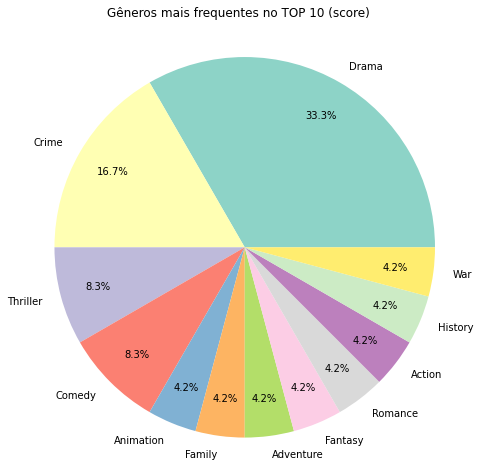

In [ ]:
# retirando valores nulos
df_top_score_gen = df_top_score_gen[df_top_score_gen > 0]

# formatação dos nomes para visualização
labels = [gen[7:] for gen in df_top_score_gen.index]

# plot
df_top_score_gen.plot.pie(autopct='%1.1f%%',
                          pctdistance=0.8,
                          radius=1.25,
                          labels=labels,
                          cmap=cmap)
plt.ylabel(' ')
plt.suptitle('Gêneros mais frequentes no TOP 10 (score)');